## Importing Packages

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from scipy import stats
import numpy as np

from scipy.stats import norm

from sklearn.metrics import r2_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.metrics import mutual_info_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.utils import check_random_state
#from stability_selection import StabilitySelection
from sklearn.linear_model import LinearRegression
from scipy.stats import norm, skew
import statistics 

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Functions
    this is just to make it easier to view some data

In [2]:


def stats_package(x,y,xlabel,ylabel):
    
    ##matplot scatter with densities
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

         # start with a rectangular Figure
    plt.figure(figsize=(8, 8))

    ax_scatter = plt.axes(rect_scatter)
    ax_scatter.tick_params(direction='in', top=True, right=True)
    ax_histx = plt.axes(rect_histx)
    ax_histx.tick_params(direction='in', labelbottom=False)
    ax_histy = plt.axes(rect_histy)
    ax_histy.tick_params(direction='in', labelleft=False)

        # the scatter plot:
    ax_scatter.scatter(x, y)

        # now determine nice limits by hand:
    binwidth = 0.25
    lim = np.ceil(np.abs([x,y]).max() / binwidth) * binwidth
    ax_scatter.set_xlim((-lim, lim))
    ax_scatter.set_ylim((-lim, lim))

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

    ax_histx.set_xlim(ax_scatter.get_xlim())
    ax_histy.set_ylim(ax_scatter.get_ylim())

    ax_scatter.set_xlabel(xlabel)
    ax_scatter.set_ylabel(ylabel)

    plt.show()

    #scatter plots and line plot
    seaborn.distplot(x, fit=norm);
    fig = plt.figure()
    res = stats.probplot(x, plot=plt)
    data = pd.concat([y, x], axis=1)
    data.plot.scatter(x=xlabel, y=ylabel, ylim=(-6,6));

    ##some basic statistics
    x_y_Linearity = r2_score(x,y)
    print(f"R squared of {xlabel} vs {ylabel} = {x_y_Linearity}")
    info_x_y = mutual_info_score(x,y)
    print(f"Mutual Info Between {xlabel} and {ylabel} = {info_x_y}")

    

## Import and View Data


In [5]:
Data = pd.read_csv(r'C:\Users\Preston\Combined Flowcals2.csv')  # importing the csv file
Data.head()
Data.info()
print(Data.isnull().any())
print(Data.dtypes)

train_stats = Data.describe()
train_stats.pop("MW")  #Here "MW" corresponds to a column header on the CSV file.
                       #I am removing it from the dataset using pop because it is the variable that I want to model
    
train_stats = train_stats.transpose()
train_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 15 columns):
SG          761 non-null float64
Pressure    761 non-null float64
Temp        761 non-null float64
C1          761 non-null float64
C2          761 non-null float64
C3          761 non-null float64
iC4         761 non-null float64
C4          761 non-null float64
iC5         761 non-null float64
C5          761 non-null float64
C6          761 non-null float64
C7          761 non-null float64
CO2         761 non-null float64
N2          761 non-null float64
MW          761 non-null float64
dtypes: float64(15)
memory usage: 89.3 KB
SG          False
Pressure    False
Temp        False
C1          False
C2          False
C3          False
iC4         False
C4          False
iC5         False
C5          False
C6          False
C7          False
CO2         False
N2          False
MW          False
dtype: bool
SG          float64
Pressure    float64
Temp        float64
C1          floa

,count,mean,std,min,25%,50%,75%,max
SG,761.0,0.743397,0.016786,0.566368,0.734147,0.744094,0.754478,0.818240
Pressure,761.0,376.955848,163.461430,0.000000,300.000000,400.000000,450.000000,3338.000000
Temp,761.0,48.048226,38.732442,0.000000,0.000000,61.000000,81.000000,127.000000
C1,761.0,0.469923,0.509093,0.000000,0.032340,0.070545,0.927500,1.941500
C2,761.0,1.341204,0.967037,0.021350,0.536500,0.744500,2.169055,8.423413
C3,761.0,2.847911,1.416220,0.625020,1.823500,2.447205,3.802840,24.188167
iC4,761.0,1.182768,0.377383,0.337520,0.971000,1.147260,1.367500,8.286672
C4,761.0,3.982941,1.237227,1.836000,3.187000,3.881730,4.613500,25.126689
iC5,761.0,2.819766,0.527945,1.194000,2.468000,2.781390,3.087530,9.106498
C5,761.0,4.119440,0.713895,2.184000,3.671000,4.075810,4.510970,10.738848


## Data Distrobutions and Correlations

Skewness: -0.011434
Kurtosis: 1.819300
Bad - tailing data
Good - Approximately normal skew


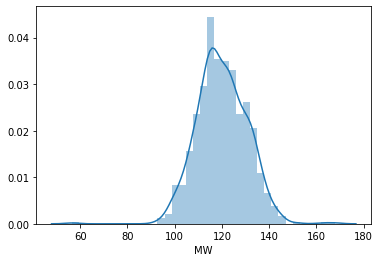

In [9]:
## Looking at the MW feature

seaborn.distplot(Data['MW'])
print("Skewness: %f" % Data['MW'].skew())
print("Kurtosis: %f" % Data['MW'].kurt())

if abs(Data['MW'].kurt()) < 1 :
    print("Good - Approximately normal kurt")
else:
    print("Bad - tailing data")
    
if abs(Data['MW'].skew()) < 0.5 :
    print("Good - Approximately normal skew")
else:
    print("Bad - non normal skew")
    

In [10]:
## Looking at all features

numeric_feats = Data.dtypes[Data.dtypes != "object"].index
# Check the skew of all numerical features
skewed_feats = Data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
iC4,8.869915
Pressure,7.392002
C4,6.735709
N2,5.325005
C3,4.821131
iC5,2.486068
CO2,1.747203
C5,1.435461
C2,0.957396
C6,0.880912


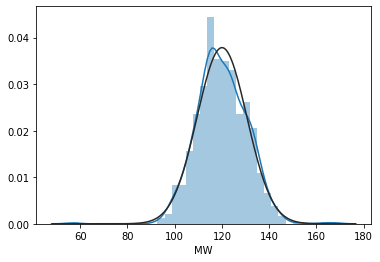

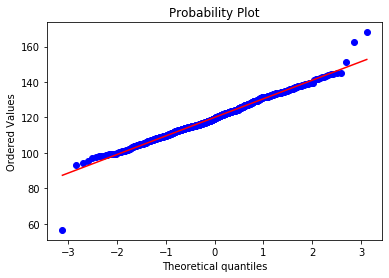

In [11]:
#histogram and normal probability plot for MW
seaborn.distplot(Data['MW'], fit=norm);
fig = plt.figure()
res = stats.probplot(Data['MW'], plot=plt)



## Usually data needs to be scaled before modeling

In [13]:
#Scaling Data
Data_scaled = (Data).astype(float)
scal = StandardScaler()
Data_scaled = scal.fit_transform(Data_scaled)
C = list(Data)
names = list(Data.columns)
print(names)
#New Dataframe
df = pd.DataFrame(Data_scaled,columns = names)

#Getting rid of outliers
df2 = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 4.5).all(axis=1)]
df2_scaled = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 4.5).all(axis=1)]

['SG', 'Pressure', 'Temp', 'C1', 'C2', 'C3', 'iC4', 'C4', 'iC5', 'C5', 'C6', 'C7', 'CO2', 'N2', 'MW']


## Creating a Covariance Matrix
    This show what features are most closely correlated to the one we are trying to model. 
    1 is highly correlated

(15.5, -0.5)

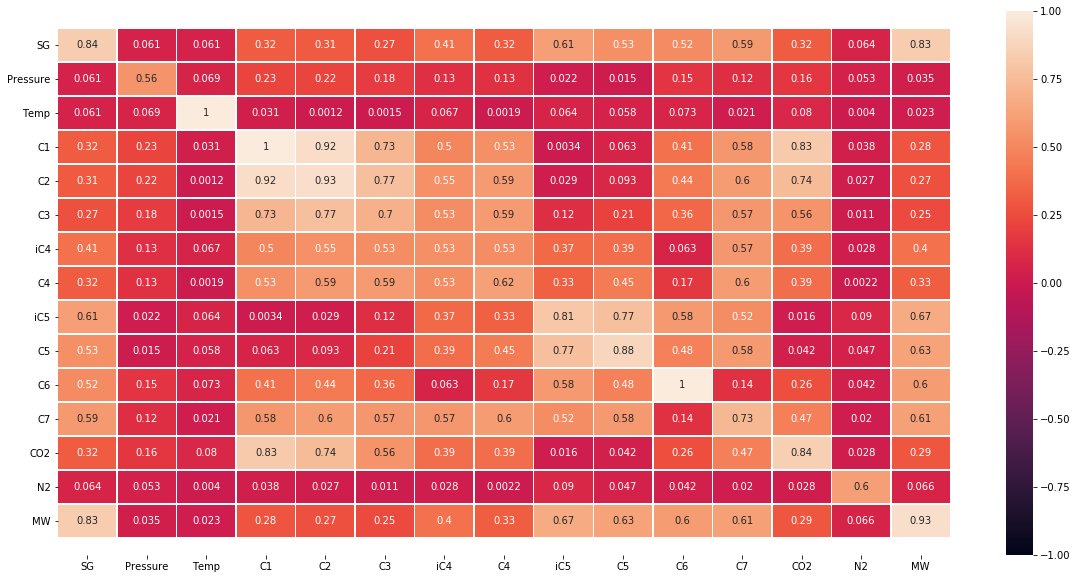

In [14]:
Cov_matrix = abs(df2_scaled.cov())
plt.figure(figsize=(20,10))
Cov_Heatmap = seaborn.heatmap(Cov_matrix, annot=True, linewidths=.5, vmin=-1, vmax=1)
bottom, top = Cov_Heatmap.get_ylim()
Cov_Heatmap.set_ylim(bottom + 0.5, top - 0.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3461F8CC8>,
      dtype=object)

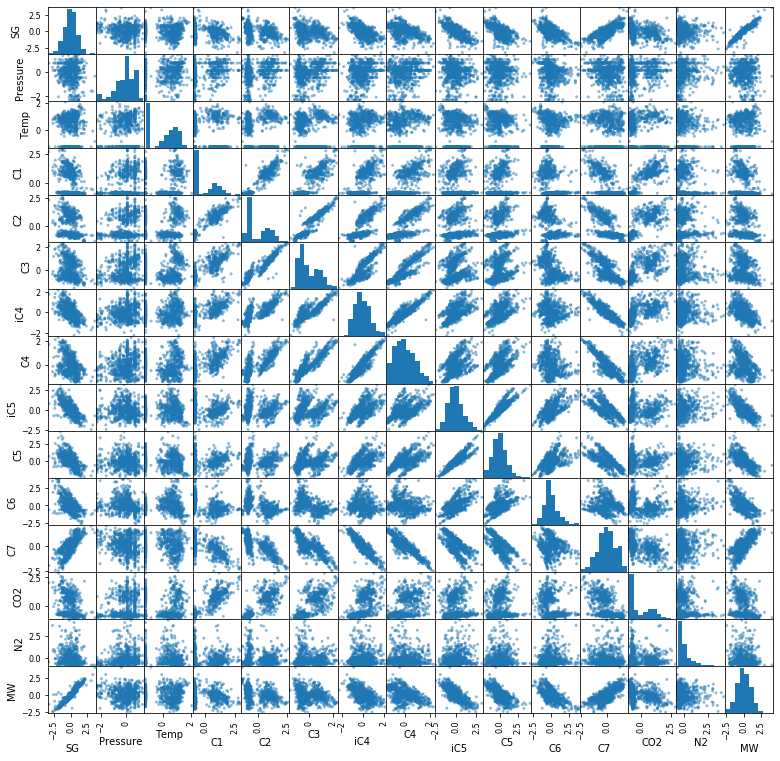

In [15]:
## looking at all of the features
scatter_matrix(df2_scaled,alpha=0.5,figsize=(13,13))

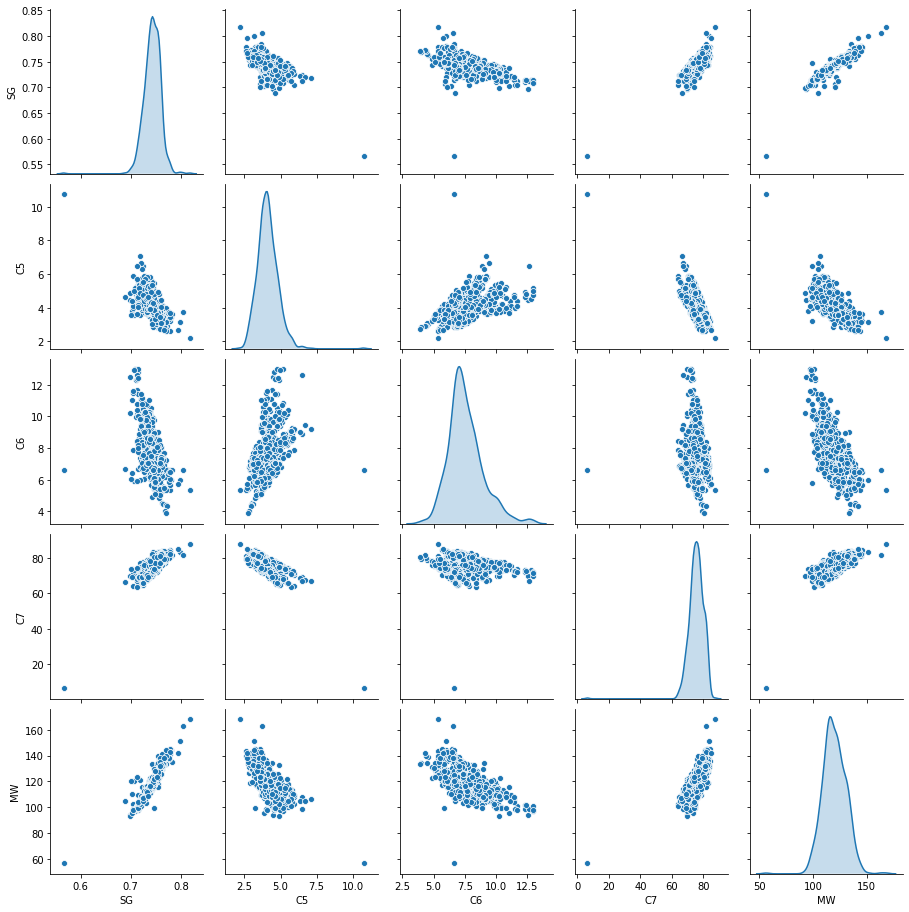

In [17]:
# just looking at the most correlated features
seaborn.pairplot(Data[["SG","C5","C6","C7","MW"]], diag_kind = "kde")

## Bivariate Analyses - This part is less important than the covariance matrix

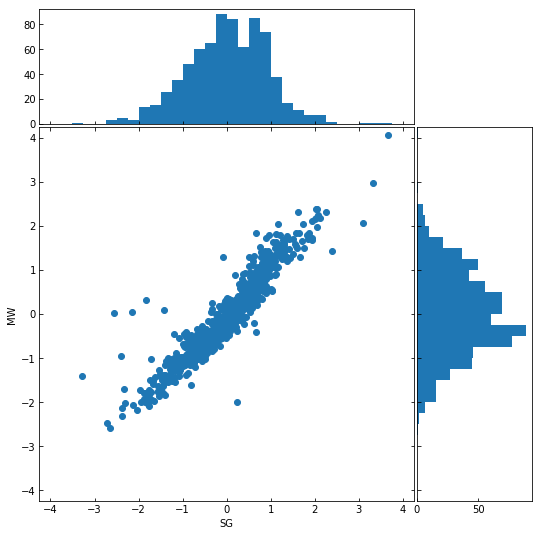

R squared of SG vs MW = 0.8650561658917069
Mutual Info Between SG and MW = 6.6240652277998935


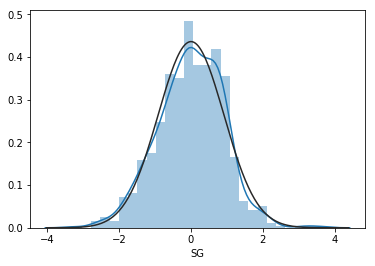

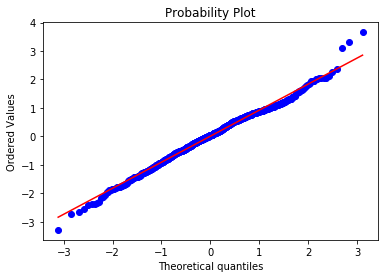

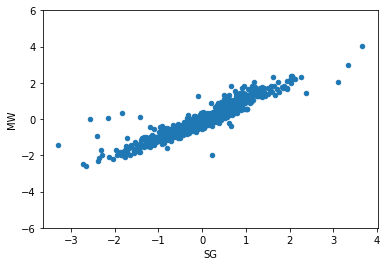

In [53]:
Stats_Package1 = stats_package(df2_scaled['SG'],df2_scaled['MW'],"SG","MW")


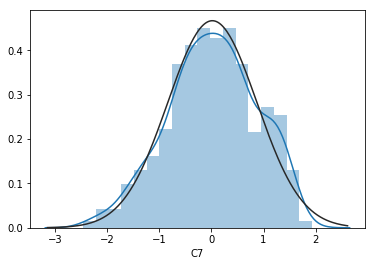

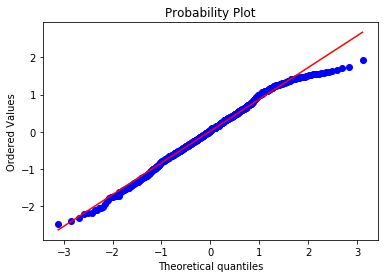

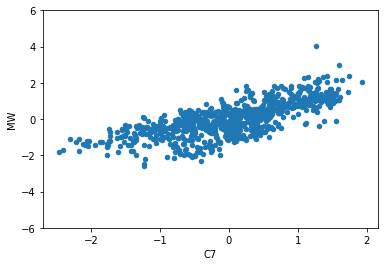

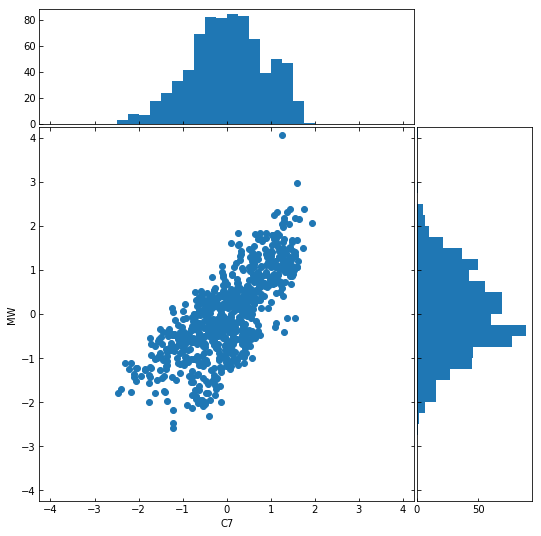

In [44]:
#histogram and normal probability plot for C7
var = 'C7'
seaborn.distplot(df2_scaled[var], fit=norm);
fig = plt.figure()
res = stats.probplot(df2_scaled[var], plot=plt)
data = pd.concat([df2_scaled['MW'], df2_scaled[var]], axis=1)
data.plot.scatter(x=var, y='MW', ylim=(-6,6));

Plot2 = scatter_density(df2_scaled['C7'],df2_scaled['MW'],"C7","MW")



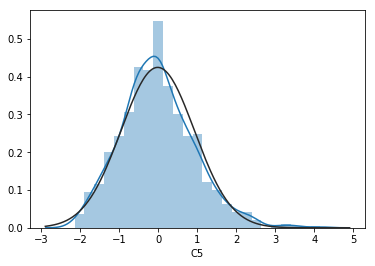

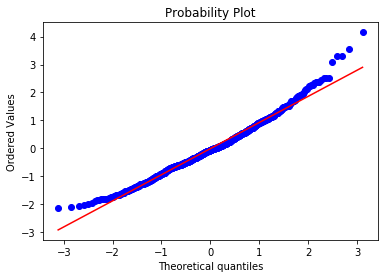

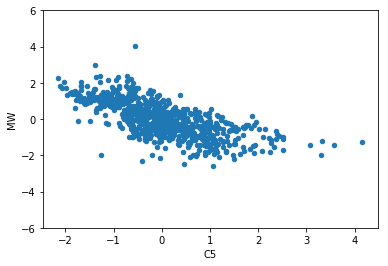

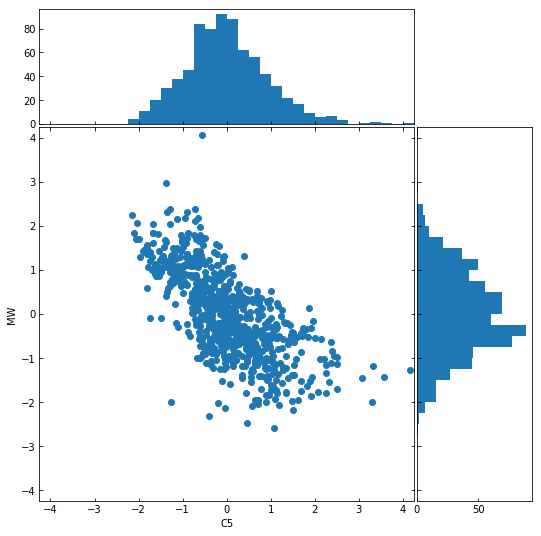

In [45]:
#histogram and normal probability plot for C5
var = 'C5'
seaborn.distplot(df2_scaled[var], fit=norm);
fig = plt.figure()
res = stats.probplot(df2_scaled[var], plot=plt)
data = pd.concat([df2_scaled['MW'], df2_scaled[var]], axis=1)
data.plot.scatter(x=var, y='MW', ylim=(-6,6));

Plot2 = scatter_density(df2_scaled['C5'],df2_scaled['MW'],"C5","MW")

## Feature Importance - Checking to see which features will be the most usefull to the model

Text(0.5, 1.0, 'Normalized Mutual Information Scores')

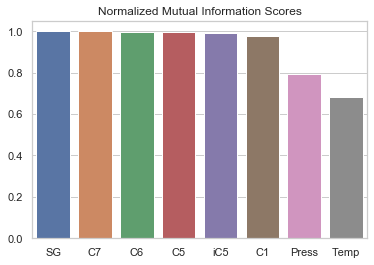

In [18]:
SG_MW = normalized_mutual_info_score(df2["SG"],df2["MW"],average_method = 'arithmetic')
C7_MW = normalized_mutual_info_score(df2["C7"],df2["MW"],average_method = 'arithmetic')
Pressure_MW = normalized_mutual_info_score(df2["Pressure"],df2["MW"],average_method = 'arithmetic')
C1_MW = normalized_mutual_info_score(df2["C1"],df2["MW"],average_method = 'arithmetic')
Temp_MW = normalized_mutual_info_score(df2["Temp"],df2["MW"],average_method = 'arithmetic')
C6_MW = normalized_mutual_info_score(df2["C6"],df2["MW"],average_method = 'arithmetic')
C5_MW = normalized_mutual_info_score(df2["C5"],df2["MW"],average_method = 'arithmetic')
iC5_MW = normalized_mutual_info_score(df2["iC5"],df2["MW"],average_method = 'arithmetic')

seaborn.set(style = "whitegrid")
ax = seaborn.barplot(x =["SG","C7","C6","C5","iC5","C1","Press", "Temp"] , y = [SG_MW,C7_MW,C6_MW,C5_MW,iC5_MW,C1_MW,Pressure_MW,Temp_MW])
ax.set_title("Normalized Mutual Information Scores")

## Basically Using a few models and seeing which features have the biggest impact on accuracy

    using:
        Lasso Regession
        Ridge Regression
        Random Forests
        Linear Regression

	Lasso	LinReg	RF	Ridge	Mean
SG	1.0	0.0	1.0	1.0	0.75
Pressure	0.0	0.0	0.0	0.0	0.0
Temp	0.0	0.0	0.0	0.02	0.0
C1	0.0	0.11	0.0	0.02	0.03
C2	0.0	0.2	0.0	0.09	0.07
C3	0.0	0.29	0.0	0.06	0.09
iC4	0.0	0.08	0.0	0.13	0.05
C4	0.0	0.26	0.0	0.26	0.13
iC5	0.0	0.11	0.02	0.03	0.04
C5	0.13	0.15	0.01	0.3	0.15
C6	0.12	0.29	0.02	0.32	0.19
C7	0.07	1.0	0.0	0.11	0.3
CO2	0.0	0.01	0.0	0.08	0.02
N2	0.0	0.0	0.0	0.02	0.0


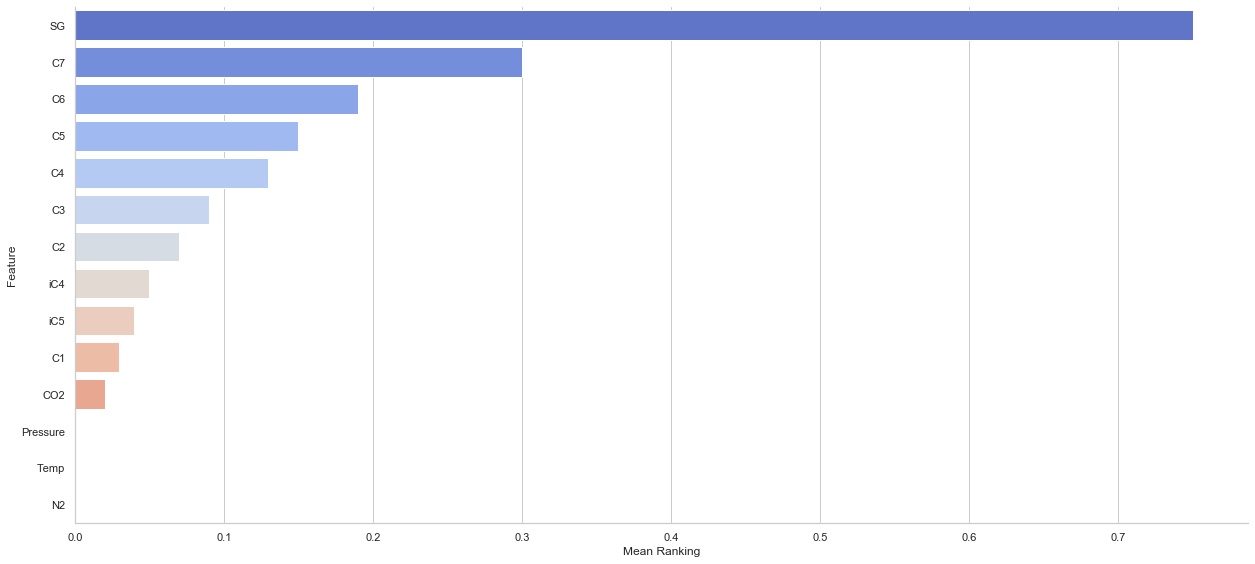

In [20]:
Y = df2.MW.values
df3 = df2.drop(['MW'],axis=1)
X = df3.values
colnames = df3.columns

from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
model =  Ridge(alpha = 7)
rfe = RFE(model,n_features_to_select = 1)
rfe.fit(X,Y)

from sklearn.preprocessing import MinMaxScaler
ranks = {}
# function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

#feature ranking
#-----------------------------------------------------------------
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X,Y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

# Using Lasso
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=0)
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames);

#feature rank matrix
#----------------------------------------------------------------
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))
    

meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)
#ploting
seaborn.catplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               height=8, aspect=2.2, palette='coolwarm')
